In [1]:
import pickle
import matplotlib.pyplot as plt
import torch

size = 16
size_label = 14
dig_size=12

In [2]:
def create_graph(name, log_sc, title=""):
    with open(f'../results/initialization/{name}.pkl', 'rb') as file:
        logs = pickle.load(file)
    sorted_data = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
    }

    for key, value in logs['norms'].items():
        category = key.split('.')[-1]

        layer_num = int(key.split('.')[2])
        
        sorted_data[category].append((layer_num, value))

    for category in sorted_data:
        sorted_data[category].sort(key=lambda x: x[0])
        
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

    categories = list(sorted_data.keys())

    colors = {'A': 'blueviolet', 'B': 'olivedrab'}


    for i, category in enumerate(categories):
        ax = axes[i // 3, i % 3]
        layers, values = zip(*sorted_data[category])
        a_values = [v['A'] for v in values]
        b_values = [v['B'] for v in values]

        if log_sc:
            ax.semilogy(layers, a_values, label='A', marker='.', color=colors['A'])
            #  ax.semilogy(layers, b_values, label='B', marker='.', color=colors['B'])
        else:
            ax.plot(layers, a_values, label='A', marker='.', color=colors['A'])
            # ax.plot(layers, b_values, label='B', marker='.', color=colors['B'])
        
        # if log_sc:
        #     ax.semilogy(layers, a_values, marker='.', color=colors['A'])
        # else:
        #     ax.plot(layers, a_values, marker='.', color=colors['A'])



        ax.set_title(category, fontsize=size)
        ax.set_xlabel('Layer', fontsize=size)
        ax.set_ylabel('Norm', fontsize=size)
        ax.legend()
        ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=dig_size)

    fig.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.savefig(f"./images/{name}_norms_g.pdf", format='pdf', dpi=300)


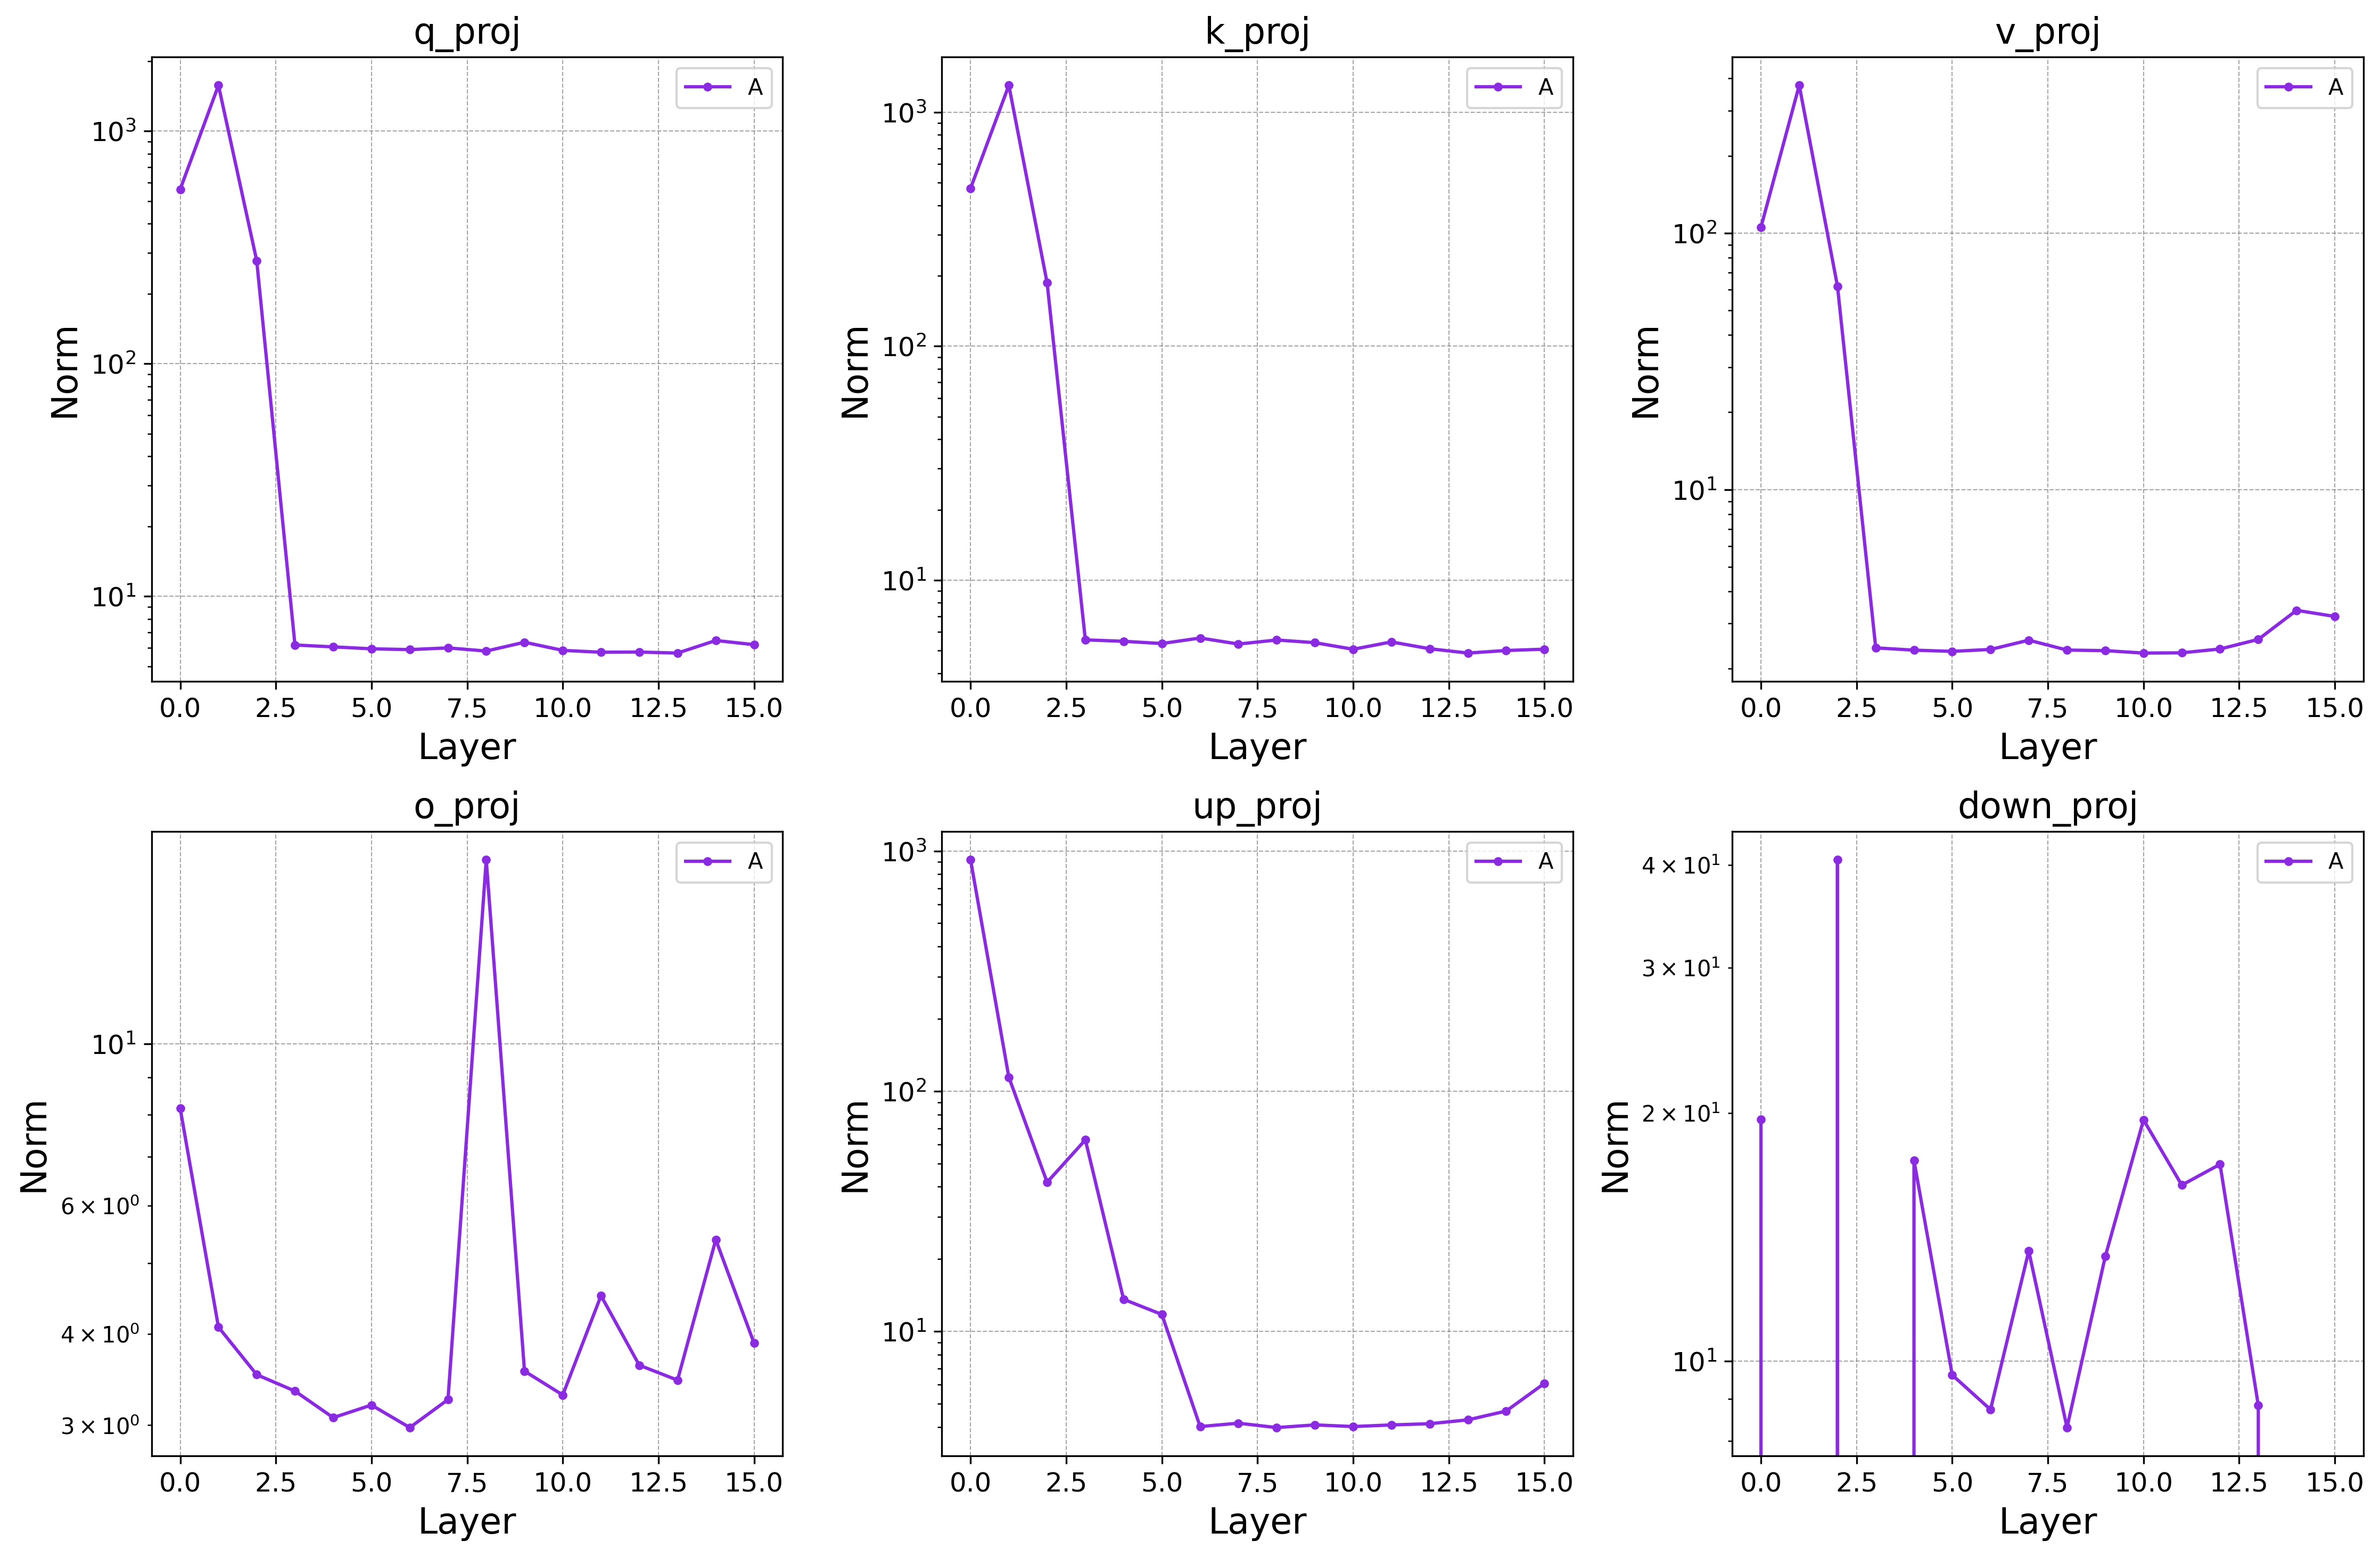

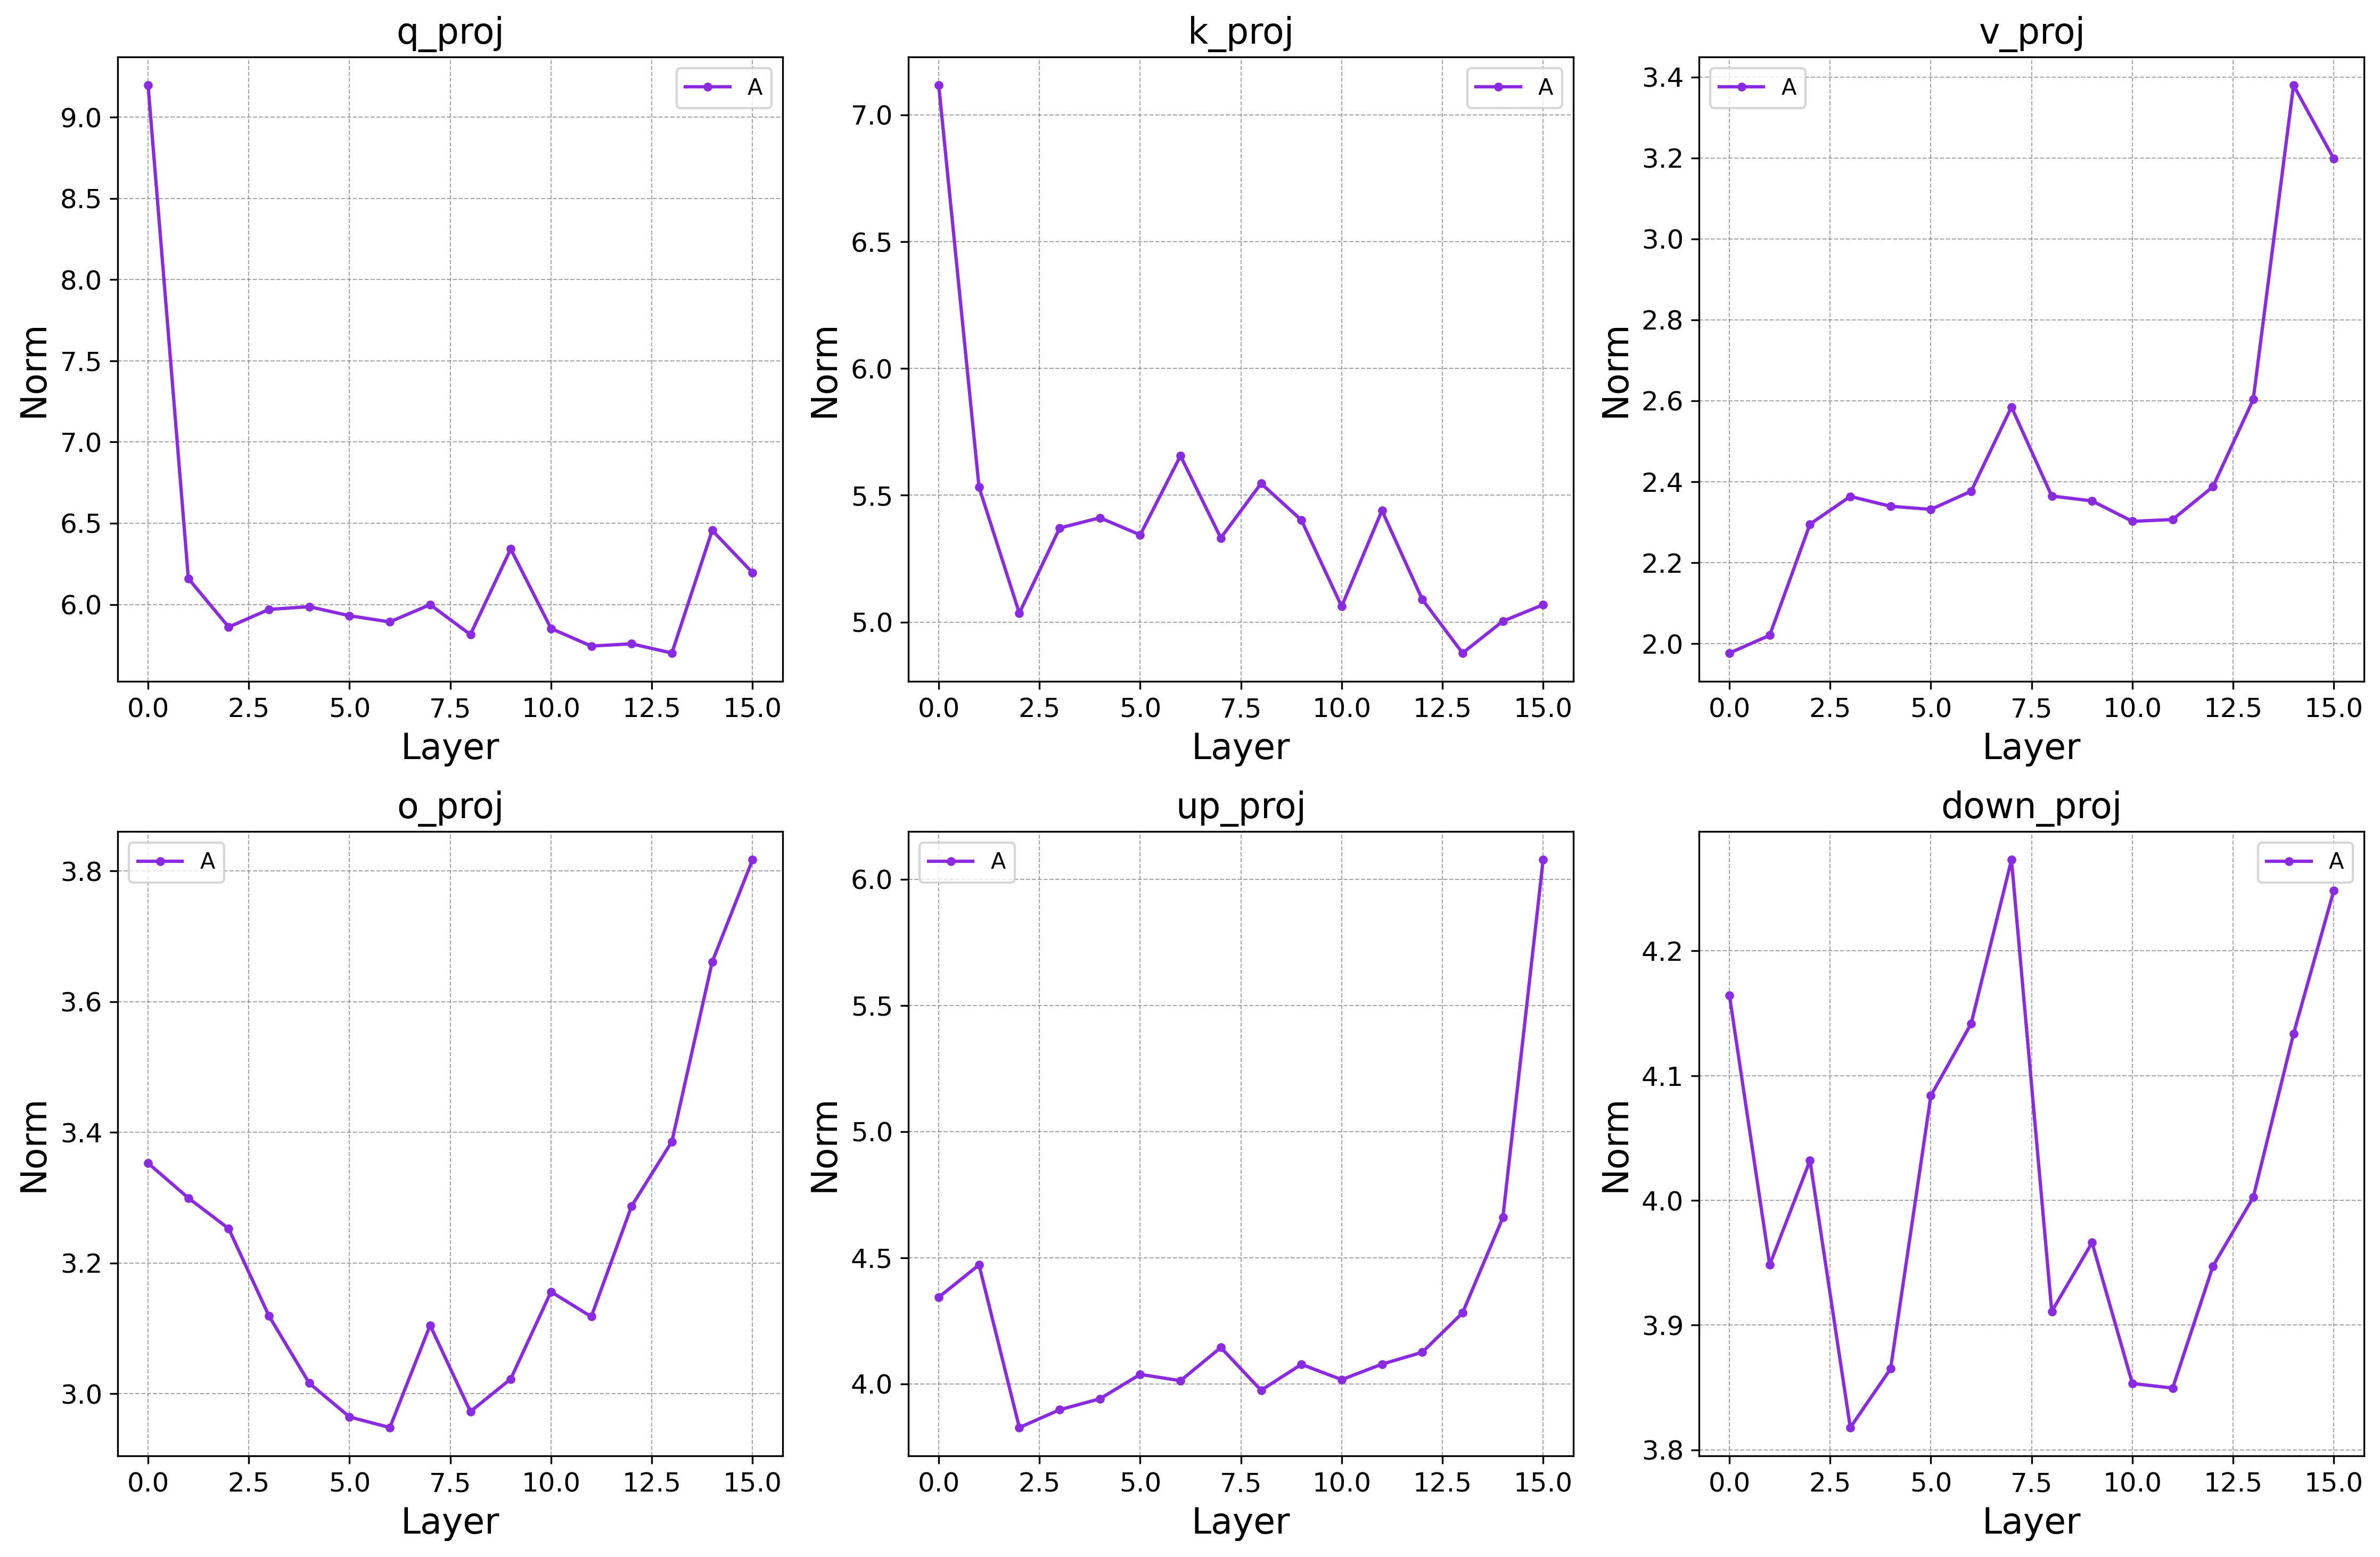

In [3]:
# create_graph('pissa', False)

create_graph('corda_m', True, '')
create_graph('corda', False, '')

# create_graph('scorda', False)

In [4]:
import copy
with open('../results/initialization/pissa.pkl', 'rb') as file:
    logs_pissa = pickle.load(file)

with open('../results/initialization/cotan.pkl', 'rb') as file:
    logs_cotan = pickle.load(file)
    
with open('../results/initialization/corda.pkl', 'rb') as file:
    logs_corda = pickle.load(file)
    
with open('../results/initialization/cotan_half.pkl', 'rb') as file:
    logs_cotan_half = pickle.load(file)
    
pissa = {
    'q_proj': [],
    'k_proj': [],
    'v_proj': [],
    'o_proj': [],
    'up_proj': [],
    'down_proj': []
}

cotan = copy.deepcopy(pissa)
corda = copy.deepcopy(pissa)
cotan_half = copy.deepcopy(pissa)


for key, value in logs_pissa['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    pissa[category].append((layer_num, value))

for category in pissa:
    pissa[category].sort(key=lambda x: x[0])
    
for key, value in logs_cotan['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    cotan[category].append((layer_num, value))

for category in cotan:
    cotan[category].sort(key=lambda x: x[0])
    
for key, value in logs_corda['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    corda[category].append((layer_num, value))

for category in corda:
    corda[category].sort(key=lambda x: x[0])
    
for key, value in logs_cotan_half['norms'].items():
    category = key.split('.')[-1]

    layer_num = int(key.split('.')[2])
    
    cotan_half[category].append((layer_num, value))

for category in cotan_half:
    cotan_half[category].sort(key=lambda x: x[0])


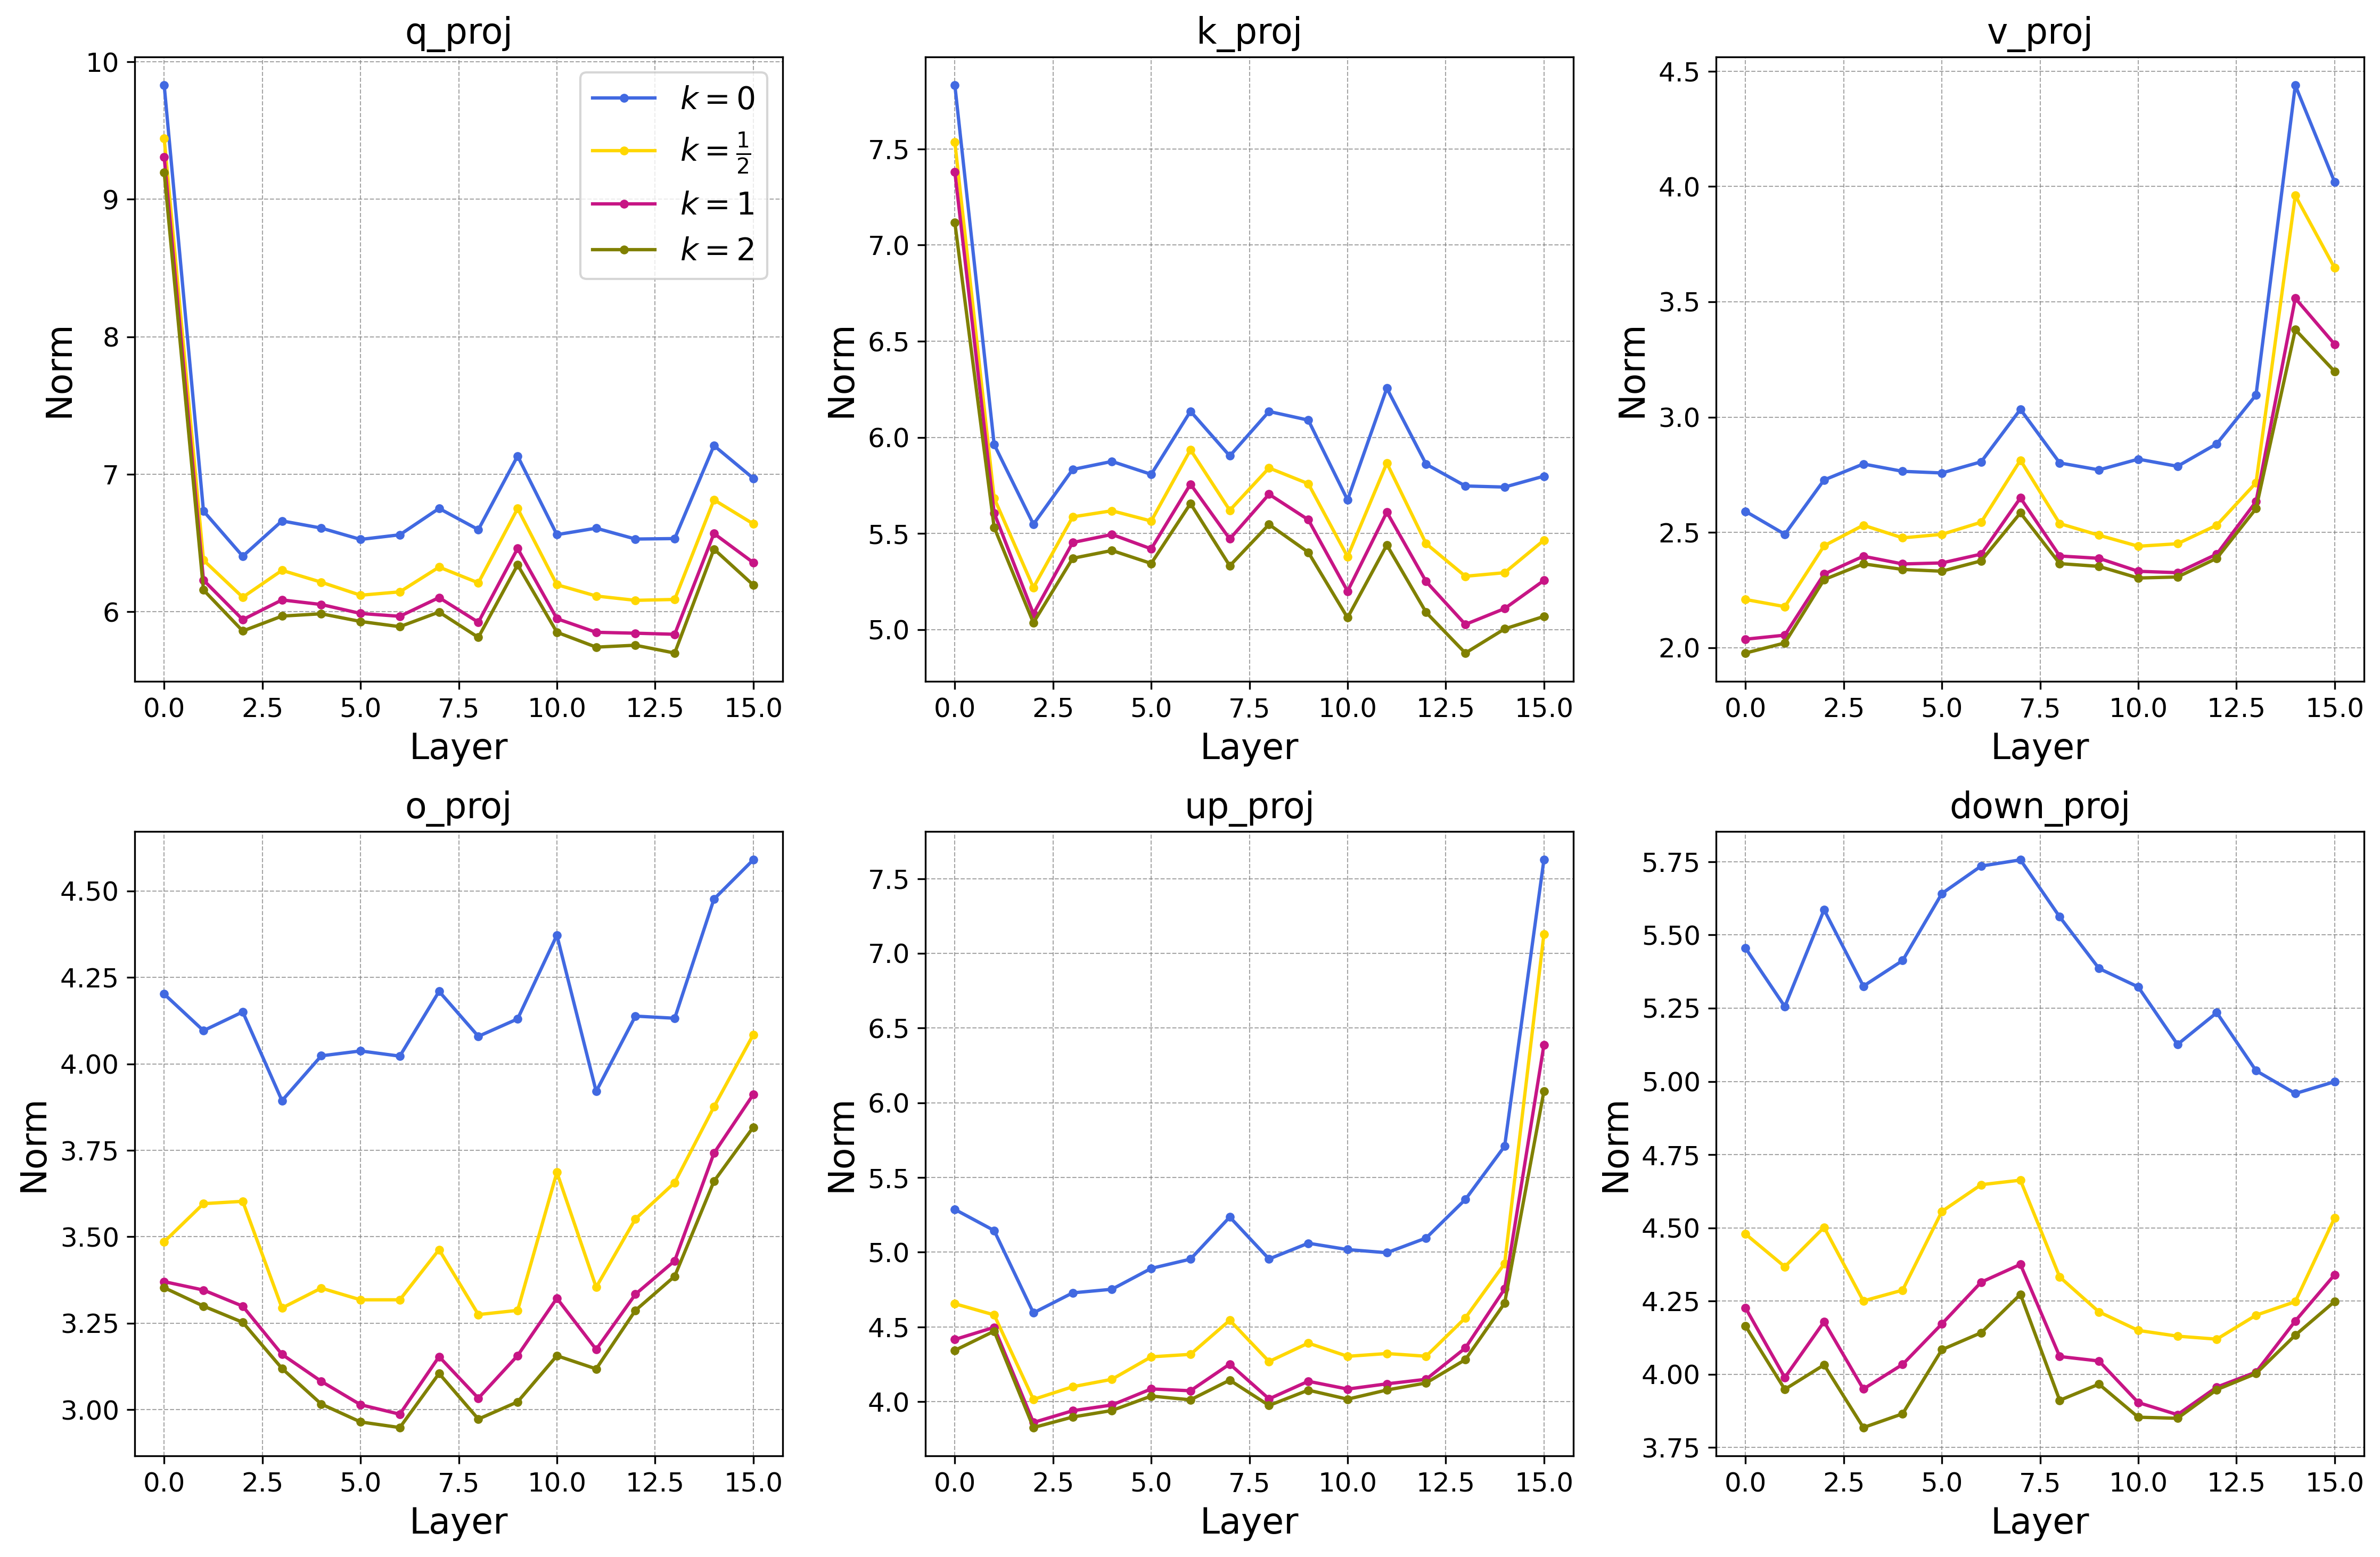

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=300)

categories = list(pissa.keys())

colors = {'pissa': 'royalblue', 'cotan': 'mediumvioletred', 'corda': 'olive', 'cotan_half': 'gold'}


for i, category in enumerate(categories):
    ax = axes[i // 3, i % 3]
    layers, values_pissa = zip(*pissa[category])
    layers, values_cotan = zip(*cotan[category])
    layers, values_corda = zip(*corda[category])
    layers, values_cotan_half = zip(*cotan_half[category])
    
    pissa_values = [v['A'] for v in values_pissa]
    cotan_values = [v['A'] for v in values_cotan]
    corda_values = [v['A'] for v in values_corda]
    cotan_half_values = [v['A'] for v in values_cotan_half]

    ax.plot(layers, pissa_values, label='$k=0$', marker='.', color=colors['pissa'])
    ax.plot(layers, cotan_half_values, label='$k=\\frac{1}{2}$', marker='.', color=colors['cotan_half'])
    ax.plot(layers, cotan_values, label='$k=1$', marker='.', color=colors['cotan'])
    ax.plot(layers, corda_values, label='$k=2$', marker='.', color=colors['corda'])

    ax.set_title(category, fontsize=size)
    ax.set_xlabel('Layer', fontsize=size)
    ax.set_ylabel('Norm', fontsize=size)
    if category == 'q_proj':
        ax.legend(fontsize=size_label)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=dig_size)

fig.suptitle('', fontsize=16)
plt.tight_layout()
plt.savefig('./images/compare_4.pdf', format='pdf', dpi=300)

In [18]:
import pickle

with open(f'../results/initialization/X.pkl', 'rb') as file:
        logs = pickle.load(file)

print(logs)


{'X': {'model.layers.0.self_attn.q_proj': tensor([[ 0.0213,  0.0213,  0.0213,  ..., -0.1421, -0.1421, -0.1421],
        [ 0.0289,  0.0289,  0.0289,  ...,  0.3080,  0.3080,  0.3080],
        [-0.0893, -0.0893, -0.0893,  ..., -0.1992, -0.1992, -0.1992],
        ...,
        [ 0.0120,  0.0120,  0.0120,  ..., -0.0713, -0.0713, -0.0713],
        [ 0.0087,  0.0087,  0.0087,  ..., -0.0733, -0.0733, -0.0733],
        [ 0.0119,  0.0119,  0.0119,  ..., -0.0879, -0.0879, -0.0879]]), 'model.layers.0.self_attn.k_proj': tensor([[ 0.0213,  0.0213,  0.0213,  ..., -0.1421, -0.1421, -0.1421],
        [ 0.0289,  0.0289,  0.0289,  ...,  0.3080,  0.3080,  0.3080],
        [-0.0893, -0.0893, -0.0893,  ..., -0.1992, -0.1992, -0.1992],
        ...,
        [ 0.0120,  0.0120,  0.0120,  ..., -0.0713, -0.0713, -0.0713],
        [ 0.0087,  0.0087,  0.0087,  ..., -0.0733, -0.0733, -0.0733],
        [ 0.0119,  0.0119,  0.0119,  ..., -0.0879, -0.0879, -0.0879]]), 'model.layers.0.self_attn.v_proj': tensor([[ 0.0213, 

In [19]:
X = logs['X']['model.layers.8.self_attn.o_proj']
del logs

print(X.shape)
C = X.float() @ X.float().T
_, S, _ = torch.linalg.svd(C.float())
print(S)

torch.Size([2048, 24576])
tensor([2.7726e+05, 2.3426e+04, 9.8168e+03,  ..., 2.6385e-02, 2.5646e-02,
        2.4432e-02])


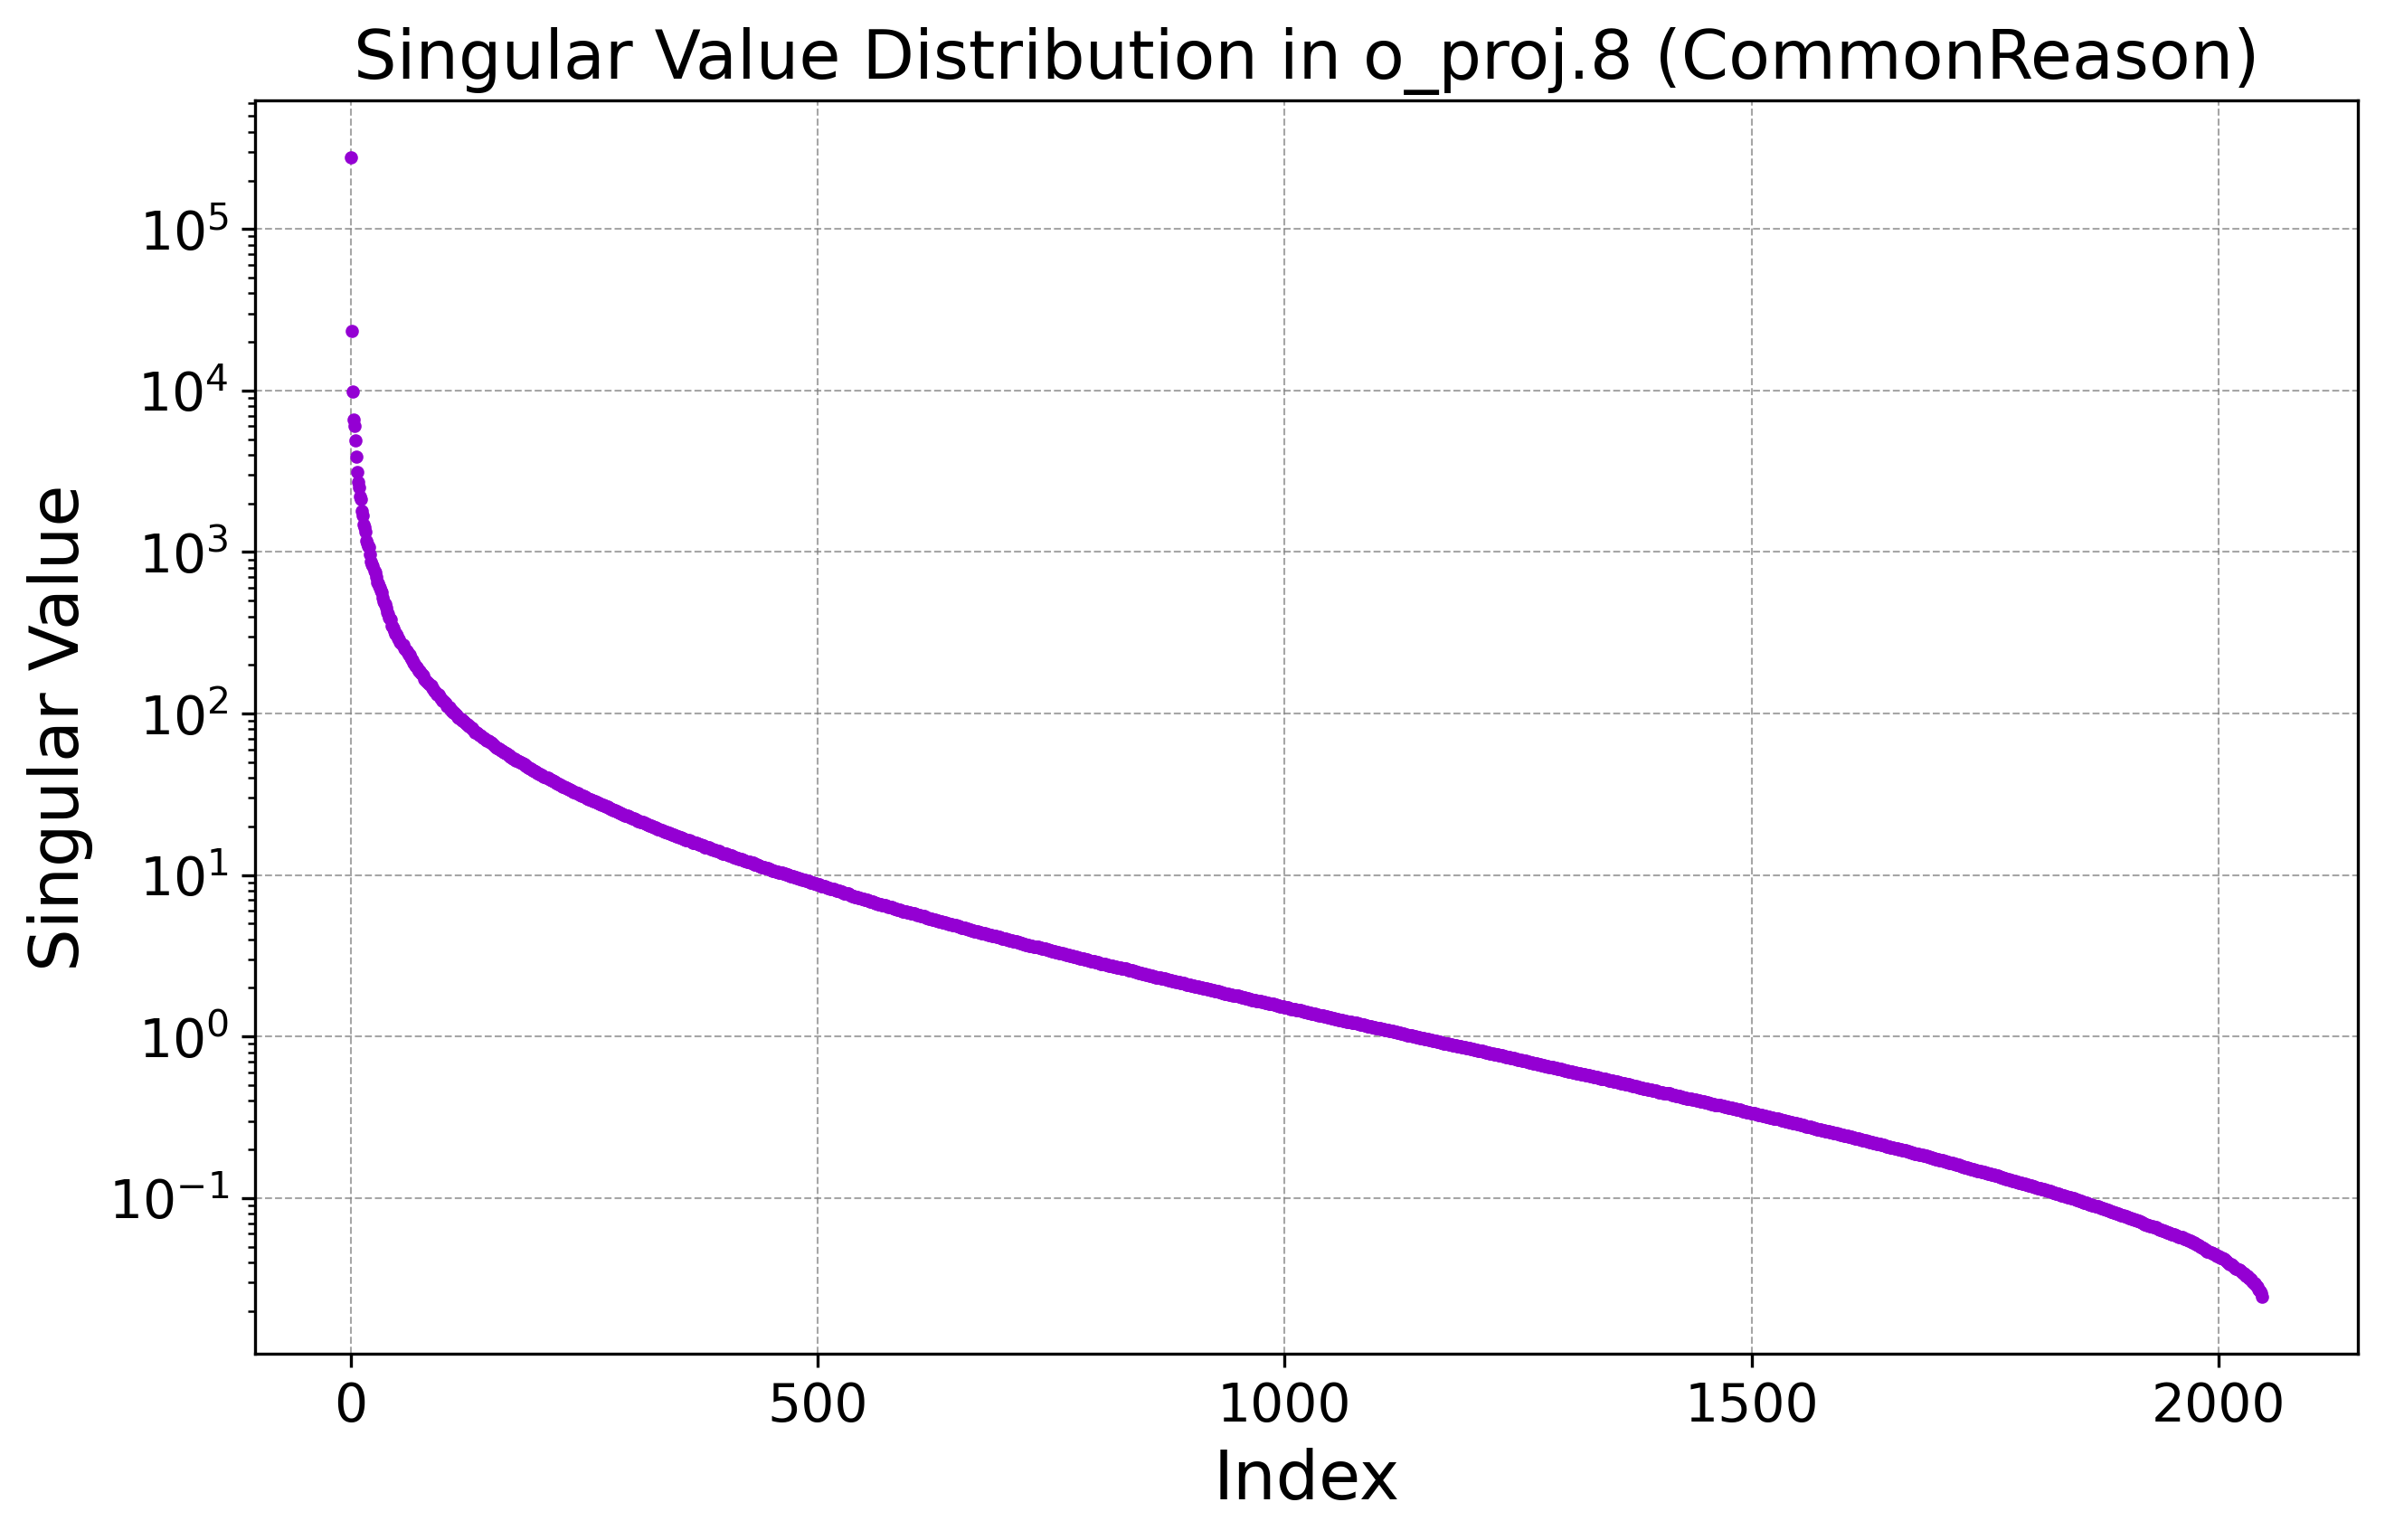

In [20]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(S.numpy(), '.', color='darkviolet', label='Singular Values', markersize=5)
plt.title('Singular Value Distribution in o_proj.8 (CommonReason)', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Singular Value', fontsize=18)
plt.yscale('log')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('./images/X_common.pdf', format='pdf', dpi=300)

In [21]:
import pickle

with open(f'../results/initialization/X_math.pkl', 'rb') as file:
        logs = pickle.load(file)

print(logs)


{'X': {'model.layers.0.self_attn.q_proj': tensor([[ 0.0213,  0.0213,  0.0213,  ..., -0.1421, -0.1421, -0.1421],
        [ 0.0289,  0.0289,  0.0289,  ...,  0.3080,  0.3080,  0.3080],
        [-0.0893, -0.0893, -0.0893,  ..., -0.1992, -0.1992, -0.1992],
        ...,
        [ 0.0120,  0.0120,  0.0120,  ..., -0.0713, -0.0713, -0.0713],
        [ 0.0087,  0.0087,  0.0087,  ..., -0.0733, -0.0733, -0.0733],
        [ 0.0119,  0.0119,  0.0119,  ..., -0.0879, -0.0879, -0.0879]]), 'model.layers.0.self_attn.k_proj': tensor([[ 0.0213,  0.0213,  0.0213,  ..., -0.1421, -0.1421, -0.1421],
        [ 0.0289,  0.0289,  0.0289,  ...,  0.3080,  0.3080,  0.3080],
        [-0.0893, -0.0893, -0.0893,  ..., -0.1992, -0.1992, -0.1992],
        ...,
        [ 0.0120,  0.0120,  0.0120,  ..., -0.0713, -0.0713, -0.0713],
        [ 0.0087,  0.0087,  0.0087,  ..., -0.0733, -0.0733, -0.0733],
        [ 0.0119,  0.0119,  0.0119,  ..., -0.0879, -0.0879, -0.0879]]), 'model.layers.0.self_attn.v_proj': tensor([[ 0.0213, 

In [22]:
X = logs['X']['model.layers.8.self_attn.o_proj']
del logs

print(X.shape)
C = X.float() @ X.float().T
_, S, _ = torch.linalg.svd(C.float())
print(S)

torch.Size([2048, 16384])
tensor([1.2026e+05, 1.6969e+04, 1.0120e+04,  ..., 7.2332e-02, 6.9707e-02,
        6.1255e-02])


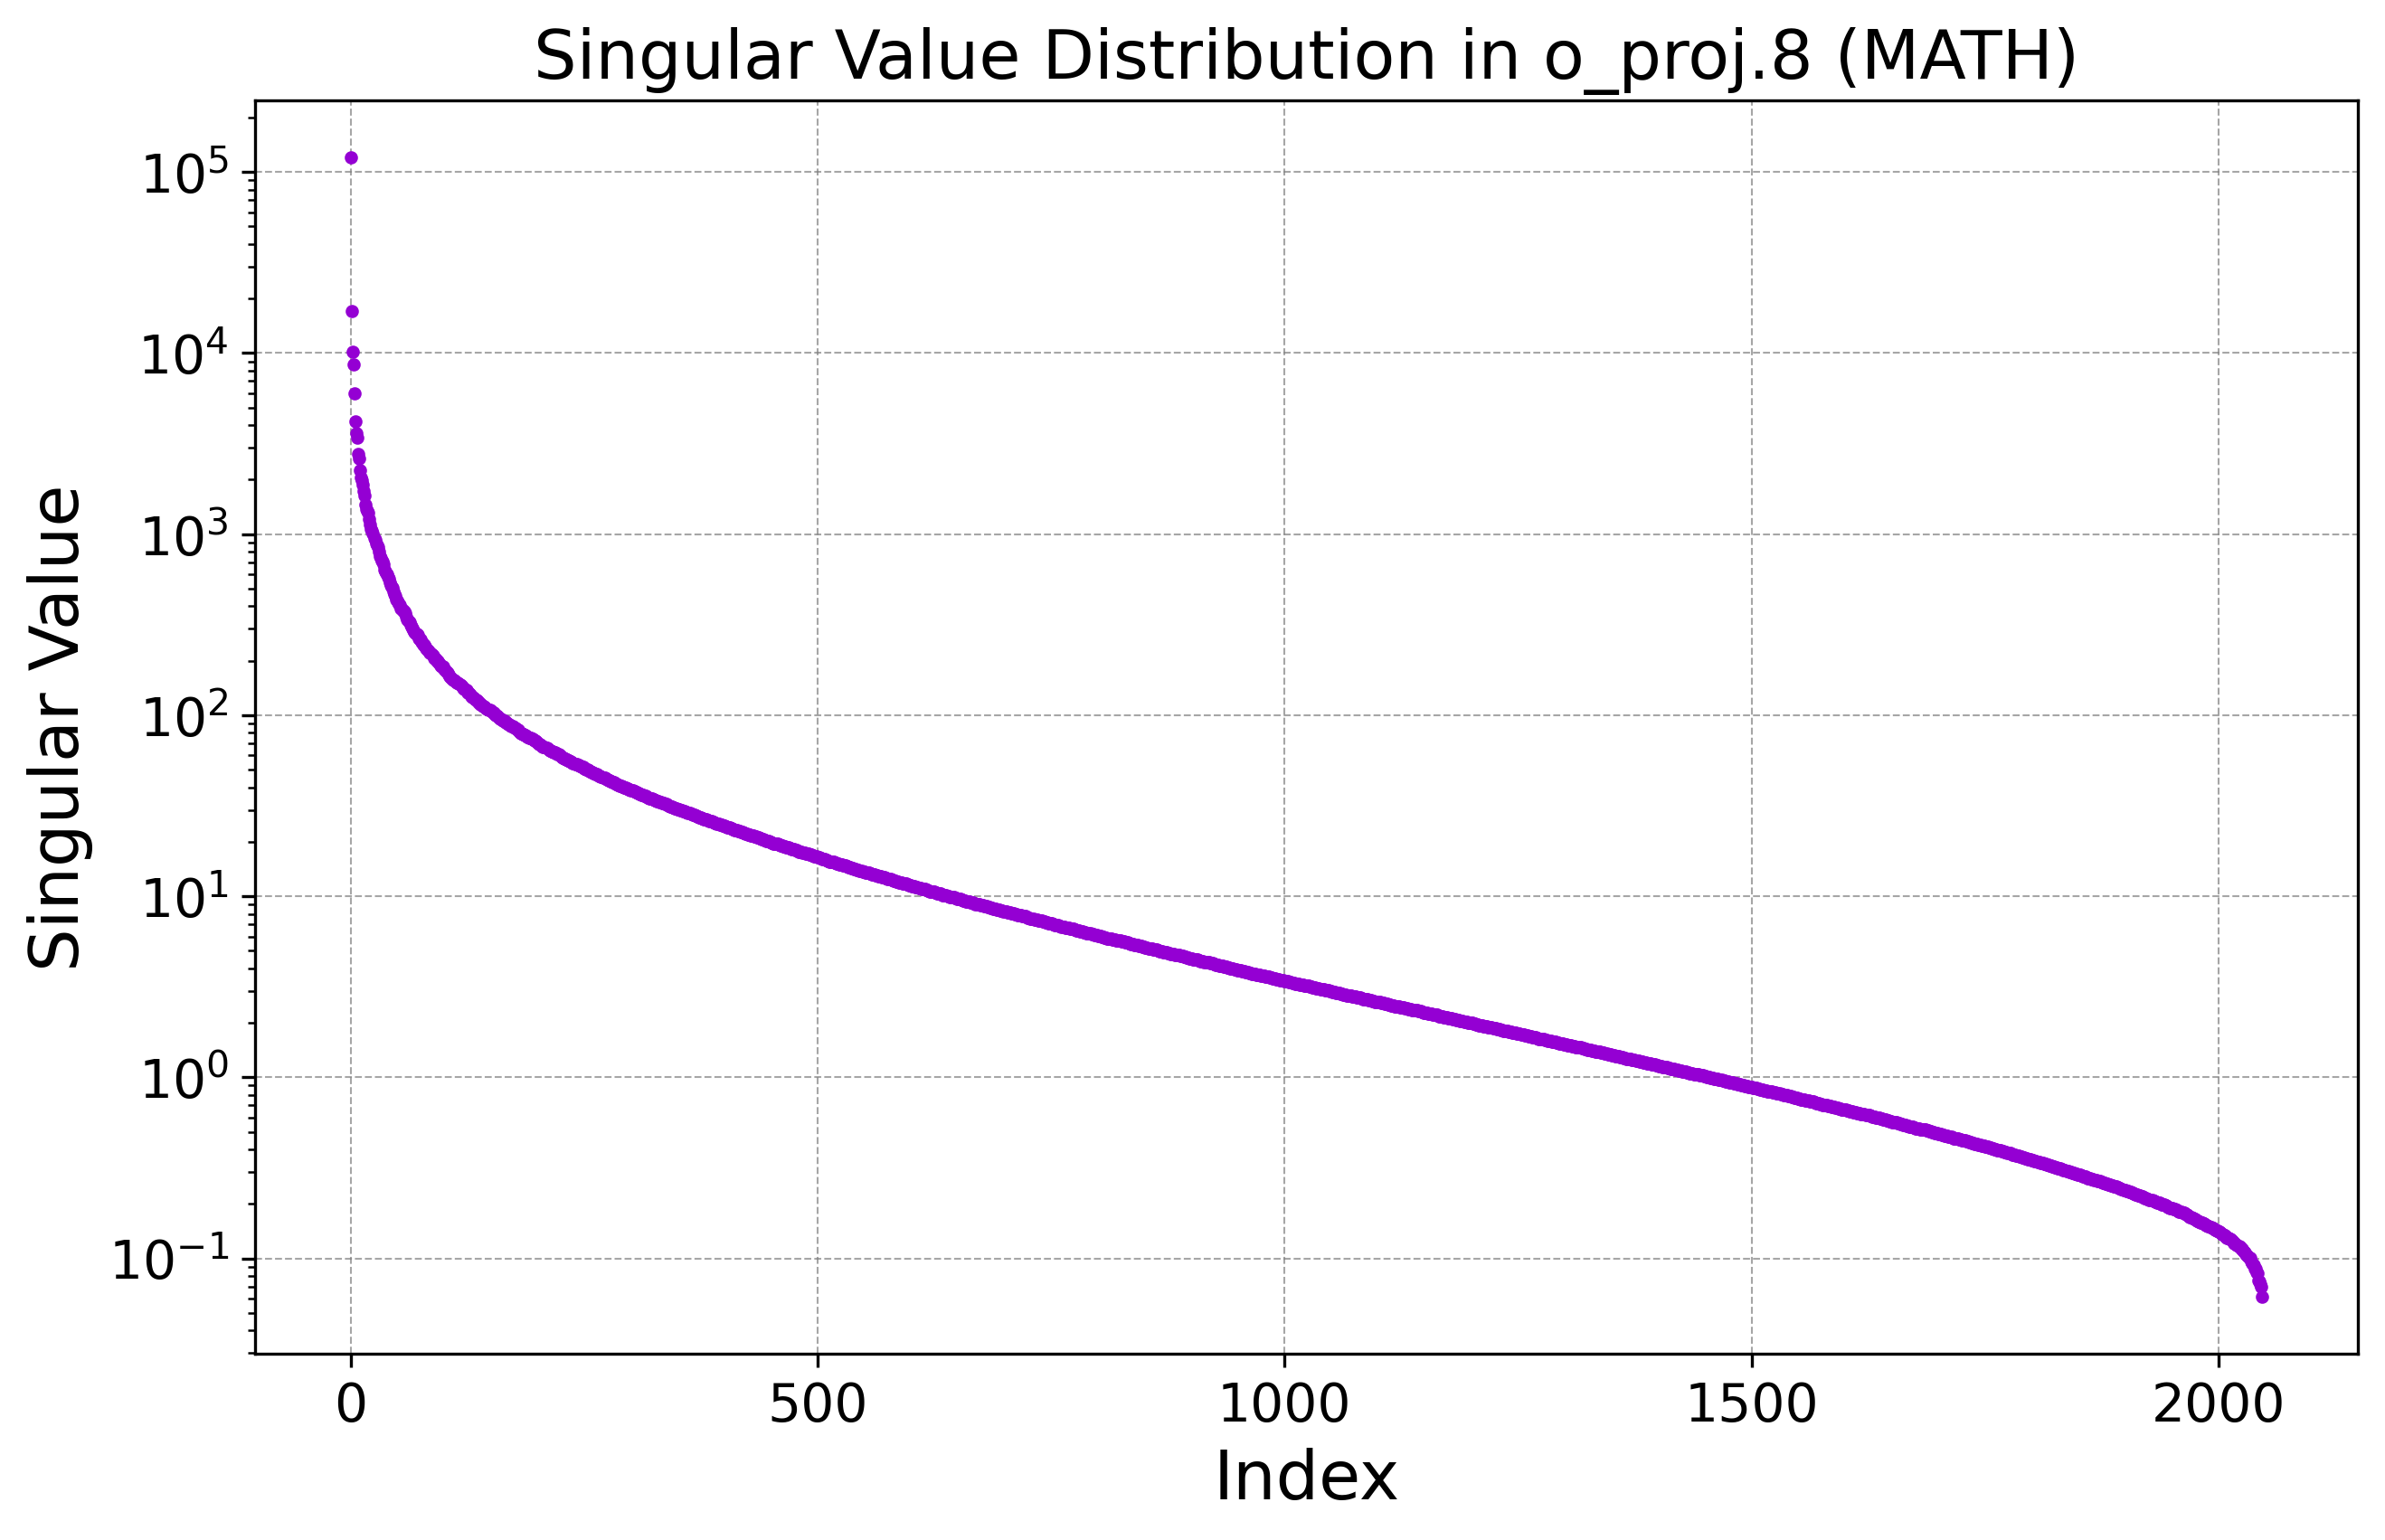

In [23]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(S.numpy(), '.', color='darkviolet', label='Singular Values', markersize=5)
plt.title('Singular Value Distribution in o_proj.8 (MATH)', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Singular Value', fontsize=18)
plt.yscale('log')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.savefig('./images/X_math.pdf', format='pdf', dpi=300)